In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Download Train Dataset

In [2]:
url_train = 'https://github.com/KD-TrendOn/House-Prices-Advanced-Regression-Techniques/raw/main/train.csv'
df = pd.read_csv(url_train)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
(df.isna().sum()!=0).sum()

19

There is 19 columns with missing values

In [5]:
%matplotlib inline

In [6]:
#!pip install sweetviz

In [7]:
#import sweetviz as sv

In [8]:
#report = sv.analyze(df)
#report.show_html("report.html")

<Axes: >

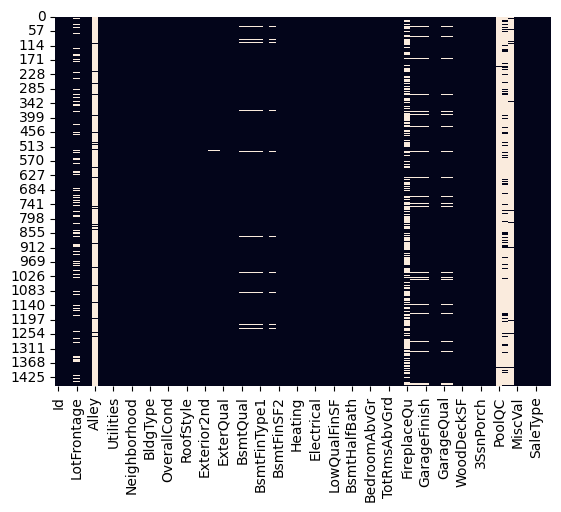

In [9]:
sns.heatmap(df.isnull(), cbar=False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
df['YearRemodAdd']

0       2003
1       1976
2       2002
3       1970
4       2000
        ... 
1455    2000
1456    1988
1457    2006
1458    1996
1459    1965
Name: YearRemodAdd, Length: 1460, dtype: int64

In [12]:
df['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [13]:
((df['YearRemodAdd']-df['YearBuilt'])<0).sum()

0

In [14]:
df['OlderThan100'] = ((2023 - df['YearBuilt'])>100).astype(int)

In [15]:
df['IsRemodded'] = ((df['YearRemodAdd']-df['YearBuilt'])>0).astype(int)

In [16]:
df=df.drop(columns=['YearRemodAdd'])

Now, lets analyze Categorial features

In [17]:
for i in df.columns:
  print('=================')
  print(i)
  print(df[i].unique())

Id
[   1    2    3 ... 1458 1459 1460]
MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea
[ 8450  9600 11250 ... 17217 13175  9717]
Street
['Pave' 'Grvl']
Alley
[nan 'Grvl' 'Pave']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 

In [18]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,OlderThan100,IsRemodded
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,103.685262,443.639726,46.549315,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,0.090411,0.476712
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,181.066207,456.098091,161.319273,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.286868,0.499629
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,0.000000,383.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,0.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,166.000000,712.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,0.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,1.000000,1.000000


In [19]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)

In [20]:
df.drop(columns=['Street'], inplace=True)

In [21]:
cat_cols = []
num_cols = []
for i in df.columns:
  if df[i].dtype =='O':
    cat_cols.append(i)
  else:
    num_cols.append(i)

In [22]:
cat_cols, num_cols

(['MSZoning',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PavedDrive',
  'PoolQC',
  'Fence',
  'MiscFeature',
  'SaleType',
  'SaleCondition'],
 ['Id',
  'MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  

In [23]:
num_cols.remove('MSSubClass')
cat_cols.append('MSSubClass')
num_cols.remove('OverallQual')
cat_cols.append('OverallQual')
num_cols.remove('OverallCond')
cat_cols.append('OverallCond')
num_cols.remove('OlderThan100')
cat_cols.append('OlderThan100')
num_cols.remove('IsRemodded')
cat_cols.append('IsRemodded')

In [24]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna('NO')

In [25]:
cat_cols.append('IsThereLowQualFinSF')
df['IsThereLowQualFinSF'] = (df['LowQualFinSF']>0).astype(int)

In [26]:
df.drop(columns=['LowQualFinSF'], inplace=True)
num_cols.remove('LowQualFinSF')
num_cols.remove('SalePrice')

In [27]:
#report = sv.analyze(df)
#report.show_html("report2.html")

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['SalePrice']), df['SalePrice'], test_size=0.2, random_state=42)

In [30]:
preprocessor = ColumnTransformer(
    [
        ('num', StandardScaler(), num_cols),
        (
            'cat',
            OneHotEncoder(handle_unknown='ignore', sparse=False),
            cat_cols
        )
    ],
    verbose_feature_names_out = False,
)
alg = Pipeline(steps=[
    ('enc', preprocessor),
    ('alg', LogisticRegression())
])

alg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('enc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Id', 'LotFrontage',
                                                   'LotArea', 'YearBuilt',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'Garag...
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual', ...])],
                                   verbose_feature_names_out=False)),
                ('alg', LogisticRegression())])

In [33]:
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [34]:
preds = alg.predict(X_test)
sqrt(mean_absolute_error(y_test, preds))

168.23307177352544

In [35]:
alg2 = Pipeline(steps=[
    ('enc', preprocessor),
    ('alg', RandomForestRegressor())
])
alg2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('enc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Id', 'LotFrontage',
                                                   'LotArea', 'YearBuilt',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'Garag...
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual', ...])],
                                   verbose_feature_names_out=False)),
                ('alg', RandomForestRegressor())])

In [36]:
preds2 = alg2.predict(X_test)
sqrt(mean_absolute_error(y_test, preds2))

133.0429333835047

In [37]:
y_test.mean(), y_test.std()

(178839.81164383562, 87730.75125912335)

In [38]:
parameters = {
    # название этпапа подготовки__гиперпараметр: [сетка (список) параметров]
    'alg__n_estimators': [100, 300, 500, 1000],
    'alg__min_samples_leaf': [1, 2, 4, 6],
    'alg__max_features': ['auto', 'sqrt', 'log2']
}

In [40]:
gs = GridSearchCV(alg2, # выбор алгоритма или пайплайна (подготовка + алгоритм)
                  parameters, # сетка гиперпараметров
                  cv=5, # количество фолдов кросс-валидации
                  verbose=2, # отображать процесс перебора гиперпараметров
                  n_jobs=2) # параллелизм вычислений

gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{'alg__max_features': 'sqrt',
 'alg__min_samples_leaf': 1,
 'alg__n_estimators': 300}

In [42]:
gs.cv_results_

{'mean_fit_time': array([ 5.4445178 , 14.03576393, 23.32082267, 51.12716532,  4.65054851,
        12.29351425, 18.52760978, 38.0947001 ,  2.96692119,  9.12152805,
        16.20099783, 29.68387847,  2.80990105,  8.26367974, 12.72541223,
        26.95628409,  0.64044762,  2.83578677,  4.11303639,  7.10763593,
         0.55531101,  1.83856945,  3.15104661,  5.77758708,  0.47022567,
         1.30620356,  2.98480711,  4.61698656,  0.55014853,  1.85582023,
         1.94210095,  4.88811588,  0.52120652,  1.38676252,  3.13346381,
         5.29183502,  0.73073926,  1.28452134,  1.87031727,  4.7004281 ,
         0.39362888,  1.04218993,  2.05310626,  3.90333428,  0.37890592,
         0.99588871,  2.62656765,  3.02015538]),
 'std_fit_time': array([1.29507151, 0.76282936, 1.48268021, 3.65190934, 0.86896657,
        1.70769997, 0.69539957, 1.47705418, 0.52663719, 0.88965697,
        1.1359442 , 1.36679329, 0.65186672, 1.11505036, 0.94116381,
        1.03136549, 0.01443302, 0.39078162, 0.90789972, 1

In [43]:
predscv = gs.best_estimator_.predict(X_test)

sqrt(mean_absolute_error(y_test, predscv))

136.93424987910927

Application of Gradient Boosting, we will use catboost


In [41]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [47]:
from catboost import CatBoostRegressor, Pool, cv

In [45]:
train_cat_data = X_train[cat_cols]
train_num_data = X_train.drop(columns=cat_cols)
cat_features = np.arange(train_cat_data.shape[1]) + train_num_data.shape[1]
train_data_for_catboost = pd.concat([train_num_data, train_cat_data], axis='columns')
train_dataset = Pool(data=train_data_for_catboost,
                     label=y_train,
                     cat_features=cat_features)

In [46]:
test_cat_data = X_test[cat_cols]
test_num_data = X_test.drop(columns=cat_cols)
test_data_for_catboost = pd.concat([test_num_data, test_cat_data], axis='columns')
test_dataset = Pool(data=test_data_for_catboost,
                     label=y_test,
                     cat_features=cat_features)

In [48]:
model=CatBoostRegressor()
model.fit(train_dataset)


Learning rate set to 0.04196
0:	learn: 75247.0240333	total: 139ms	remaining: 2m 18s
1:	learn: 73308.6192799	total: 211ms	remaining: 1m 45s
2:	learn: 71439.6806030	total: 285ms	remaining: 1m 34s
3:	learn: 69765.1334001	total: 351ms	remaining: 1m 27s
4:	learn: 68007.9799638	total: 379ms	remaining: 1m 15s
5:	learn: 66548.9561561	total: 410ms	remaining: 1m 7s
6:	learn: 65051.7525390	total: 439ms	remaining: 1m 2s
7:	learn: 63511.1253674	total: 455ms	remaining: 56.5s
8:	learn: 61971.1906253	total: 491ms	remaining: 54s
9:	learn: 60473.9275936	total: 521ms	remaining: 51.6s
10:	learn: 59084.4441826	total: 548ms	remaining: 49.3s
11:	learn: 57757.6123227	total: 573ms	remaining: 47.2s
12:	learn: 56458.1268554	total: 600ms	remaining: 45.6s
13:	learn: 55170.8010039	total: 638ms	remaining: 44.9s
14:	learn: 53966.8823803	total: 668ms	remaining: 43.9s
15:	learn: 52904.5290061	total: 701ms	remaining: 43.1s
16:	learn: 51833.1138772	total: 728ms	remaining: 42.1s
17:	learn: 50872.3996857	total: 748ms	remai

In [49]:
catboost_preds = model.predict(test_dataset)
sqrt(mean_absolute_error(y_test, catboost_preds))

124.69340746405953

In [63]:
Test = pd.read_csv('https://github.com/KD-TrendOn/House-Prices-Advanced-Regression-Techniques/raw/main/test.csv')
Test['OlderThan100'] = ((2023 - Test['YearBuilt'])>100).astype(int)
Test['IsRemodded'] = ((Test['YearRemodAdd']-Test['YearBuilt'])>0).astype(int)
Test=Test.drop(columns=['YearRemodAdd'])
Test.drop(columns=['Street'], inplace=True)
Test['LotFrontage'].fillna(Test['LotFrontage'].median(),inplace=True)
Test['IsThereLowQualFinSF'] = (Test['LowQualFinSF']>0).astype(int)
Test.drop(columns=['LowQualFinSF'], inplace=True)
Test[num_cols] = Test[num_cols].fillna(Test[num_cols].median())
Test[cat_cols] = Test[cat_cols].fillna('NO')

In [61]:
Test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,OlderThan100,IsRemodded,IsThereLowQualFinSF
0,1461,20,RH,80.0,11622,NaN,Reg,Lvl,AllPub,Inside,...,MnPrv,NaN,0,6,2010,WD,Normal,0,0,0
1,1462,20,RL,81.0,14267,NaN,IR1,Lvl,AllPub,Corner,...,NaN,Gar2,12500,6,2010,WD,Normal,0,0,0
2,1463,60,RL,74.0,13830,NaN,IR1,Lvl,AllPub,Inside,...,MnPrv,NaN,0,3,2010,WD,Normal,0,1,0
3,1464,60,RL,78.0,9978,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,6,2010,WD,Normal,0,0,0
4,1465,120,RL,43.0,5005,NaN,IR1,HLS,AllPub,Inside,...,NaN,NaN,0,1,2010,WD,Normal,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,6,2006,WD,Normal,0,0,0
1455,2916,160,RM,21.0,1894,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,4,2006,WD,Abnorml,0,0,0
1456,2917,20,RL,160.0,20000,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2006,WD,Abnorml,0,1,0
1457,2918,85,RL,62.0,10441,NaN,Reg,Lvl,AllPub,Inside,...,MnPrv,Shed,700,7,2006,WD,Normal,0,0,0


In [60]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OlderThan100,IsRemodded,IsThereLowQualFinSF
0,1,60,RL,65.0,8450,NO,Reg,Lvl,AllPub,Inside,...,NO,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,NO,Reg,Lvl,AllPub,FR2,...,NO,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,NO,IR1,Lvl,AllPub,Inside,...,NO,0,9,2008,WD,Normal,223500,0,1,0
3,4,70,RL,60.0,9550,NO,IR1,Lvl,AllPub,Corner,...,NO,0,2,2006,WD,Abnorml,140000,1,1,0
4,5,60,RL,84.0,14260,NO,IR1,Lvl,AllPub,FR2,...,NO,0,12,2008,WD,Normal,250000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,NO,Reg,Lvl,AllPub,Inside,...,NO,0,8,2007,WD,Normal,175000,0,1,0
1456,1457,20,RL,85.0,13175,NO,Reg,Lvl,AllPub,Inside,...,NO,0,2,2010,WD,Normal,210000,0,1,0
1457,1458,70,RL,66.0,9042,NO,Reg,Lvl,AllPub,Inside,...,Shed,2500,5,2010,WD,Normal,266500,0,1,0
1458,1459,20,RL,68.0,9717,NO,Reg,Lvl,AllPub,Inside,...,NO,0,4,2010,WD,Normal,142125,0,1,0


In [64]:
Test_cat_data = Test[cat_cols]
Test_num_data = Test.drop(columns=cat_cols)
Test_data_for_catboost = pd.concat([Test_num_data, Test_cat_data], axis='columns')
result = model.predict(Test_data_for_catboost)
result

array([127609.19024751, 162408.81963595, 188617.23889789, ...,
       158056.95857085, 116910.27971252, 208330.57982028])

In [66]:
submission = pd.read_csv('https://github.com/KD-TrendOn/House-Prices-Advanced-Regression-Techniques/raw/main/sample_submission.csv')

In [67]:
submission['SalePrice']=result
submission.to_csv('./my_submission.csv', index=False)